### Standard imports

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats
from sklearn.impute import SimpleImputer

### Kaggle TelCo Churn imports

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV

### Increase Jupyter display cell-width

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

### Load data set into Pandas dataframe

In [4]:
churn_df = pd.read_csv('churn_raw_data.csv')

#### Display Churn dataframe

In [5]:
churn_df

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1.0,1.0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927.0,56.25100,-133.37571,...,171.449762,904.536110,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0
1,2.0,2.0,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661.0,44.32893,-84.24080,...,242.948015,800.982766,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0
2,3.0,3.0,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148.0,45.35589,-123.24657,...,159.440398,2054.706961,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0
3,4.0,4.0,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014.0,32.96687,-117.24798,...,120.249493,2164.579412,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0
4,5.0,5.0,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461.0,29.38012,-95.80673,...,150.761216,271.493436,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,10000.0,10000.0,T38070,9de5fb6e-bd33-4995-aec8-f01d0172a499,Clarkesville,GA,Habersham,30523.0,34.70783,-83.53648,...,218.371000,5857.586000,2.0,2.0,3.0,3.0,3.0,3.0,4.0,1.0
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Now just the head of the dataframe
churn_df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1.0,1.0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927.0,56.25100,-133.37571,...,171.449762,904.536110,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0
1,2.0,2.0,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661.0,44.32893,-84.24080,...,242.948015,800.982766,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0
2,3.0,3.0,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148.0,45.35589,-123.24657,...,159.440398,2054.706961,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0
3,4.0,4.0,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014.0,32.96687,-117.24798,...,120.249493,2164.579412,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0
4,5.0,5.0,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461.0,29.38012,-95.80673,...,150.761216,271.493436,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0


#### Describe Churn statistics

In [7]:
churn_df.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,10000.000000,10000.000000,...,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,11.452955,12.016000,...,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,7.025921,3.025898,...,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,-1.348571,1.000000,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.000000,35.000000,8.054362,10.000000,...,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,10.202896,12.000000,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,12.487644,14.000000,...,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,47.049280,23.000000,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


#### List of Dataframe Columns

In [8]:
churn_df.columns

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

#### Create a variable for only the responses to the survey at the end of the data set

In [9]:
churn_survey = pd.read_csv('churn_raw_data.csv', usecols=[21,44,45,46,47,48,49,50,51])
churn_survey.head()

,Churn,item1,item2,item3,item4,item5,item6,item7,item8
0,No,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0
1,Yes,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0
2,No,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0
3,No,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0
4,Yes,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0


#### Rename survey columns for better description

In [10]:
churn_survey.columns = ['Churn', 'Response', 'Fix', 'Replace', 'Reliability', 
                        'Options', 'Respect', 'Courteous', 'Listening']
churn_survey.head()

,Churn,Response,Fix,Replace,Reliability,Options,Respect,Courteous,Listening
0,No,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0
1,Yes,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0
2,No,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0
3,No,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0
4,Yes,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0


In [11]:
churn_survey.describe()

,Response,Fix,Replace,Reliability,Options,Respect,Courteous,Listening
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [12]:
churn_df.index

RangeIndex(start=0, stop=10004, step=1)

In [13]:
churn_df.loc[0]

Unnamed: 0                                                 1
CaseOrder                                                  1
Customer_id                                          K409198
Interaction             aa90260b-4141-4a24-8e36-b04ce1f4f77b
City                                             Point Baker
State                                                     AK
County                                 Prince of Wales-Hyder
Zip                                                    99927
Lat                                                   56.251
Lng                                                 -133.376
Population                                                38
Area                                                   Urban
Timezone                                       America/Sitka
Job                        Environmental health practitioner
Children                                                 NaN
Age                                                       68
Education               

In [14]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  float64
 1   CaseOrder             10000 non-null  float64
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  float64
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  float64
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                

In [15]:
len(churn_df)

10004

## <span style="color:red">Part  I: Research Question</span>

### A. Description of realistic organizational need & consequential question to be addressed

### <span style="color:green"><b>Question description</b>:</span>
<br>Which customers are at high risk of churn?  How can I tell when they will leave and what will push them over the edge?  Are there responses to survey that predict potential customer churn?

### B. Description of variables & specific type of data being described, <i>with examples</i>

### <span style="color:green"><b>Variables & data description</b>:</span>
<br>The data set is 10,000 customer records of a popular telecommunications company.  The dependent variable (target) in question is whether or not each customer has continued or discontinued service within the last month.  This column is titled "Churn".  Independent variables or predictors that may lead to identifying a relationship with the dependent variable of "Churn" within the data set include: 1) services that each customer signed up for (for example, multiple phone lines, technical support add-ons or streaming media), customer account information (customers' tenure with the company, payment methods, bandwidth usage, etc.) and customer demographics (gender, marital status, income, etc.).  Finally, there are eight independent variables that represent responses customer-perceived importance of company services and features.

In [16]:
# Find number of records and columns of data set
churn_df.shape

(10004, 52)

In [17]:
# Add an index field
churn_df['index'] = pd.Series(range(0,10000))

In [18]:
churn_df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,index
0,1.0,1.0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927.0,56.25100,-133.37571,...,904.536110,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,0.0
1,2.0,2.0,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661.0,44.32893,-84.24080,...,800.982766,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,1.0
2,3.0,3.0,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148.0,45.35589,-123.24657,...,2054.706961,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,2.0
3,4.0,4.0,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014.0,32.96687,-117.24798,...,2164.579412,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0,3.0
4,5.0,5.0,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461.0,29.38012,-95.80673,...,271.493436,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,4.0


## <span style="color:red">Part II: Data-Cleaning Plan</span>

### C. Explanation of data cleaning plan
1. Plan proposal to identify anomalies, <i>including relevant techniques & specific steps</i> 
2.  Justify your approach for assessing the quality of the data, include:
<br>&ensp; •  characteristics of the data being assessed,
<br>&ensp; •  the approach used to assess the quality.

3.  Justify your selected programming language and any libraries and packages that will support the data-cleaning process.

4.  Provide the code you will use to identify the anomalies in the data.

### <span style="color:green"><b>1. Plan to Find Anomalies</b>:</span>
I will follow a text book approach of:
<br>&ensp; 1. backing up my data and the process I am following as a copy to my machine and, since this is a manageable data set, to GitHub using command line and gitbash;
<br>&ensp; 2. reading the data set into Python using Pandas read_csv command;
<br>&ensp; 3. naming the data set as a the variable "churn_df" and subsequent useful slices of the dataframe as "data"; 
<br>&ensp; 4. examine coding errors, including data missing, in the collection of the data set;
<br>&ensp; 5. find outliers that may create or hide statistical significance using histograms;
<br>&ensp; 6. and, impute records missing data with meaningful measures of central tendency (mean, median or mode) or simply remove outliers that are several standard deviations above the mean

### <span style="color:green"><b>2. Justification of Approach</b>:</span>
"The justification includes the characteristics of the data being assessed and references the approach used to assess the quality of the data. The justified approach aligns with the selected data set."

Describe data as numerical or categorical and a bit bungled . . . as per Dan.

### <span style="color:green"><b>3. Justification of Tools</b>:</span>
I will use the Python programming language as I have a bit of a background in Python having studied machine learning independently over the last year before beginning this masters program and its ability to perform many things right "out of the box."  Python provides clean, intuitive and readable syntax that has become ubiquitous across in the data science industry.  Also, I find the Jupyter notebooks a convenient way to run code visually, in its attractive single document markdown format, the ability to display results of code and graphic visualizations and provide crystal-clear running documentation for future reference.   A thorough installation and importation of Python packages and libraries will provide specially designed code to perfom complex data science tasks rather than personally building them from scratch.  This will include: 
<br>&ensp; • NumPy - to work with arrays
<br>&ensp; • Pandas - to load data sets
<br>&ensp; • Matplotlib - to plot charts
<br>&ensp; • Scikit-learn - for machine learning model classes
<br>&ensp; • SciPy - for mathematical problems, specifically linear algebra transformations
<br>&ensp; • Seaborn - for high-level interface and atttractive visualizations

A quick, precise example of loading a data set and creating a variable efficiently is using to call the Pandas library and its subsequent "read_csv" function in order to manipulate our data as a dataframe:
<span style="color:coral">
<br>&ensp; import pandas as pd
<br>&ensp; df = pd.read_csv('Data.csv')
</span>

### <span style="color:green"><b>4. Code for anomaly identification</b>:</span>
code here . . . 

In [19]:
!file churn_raw_data.csv

'file' is not recognized as an internal or external command,
operable program or batch file.


In [20]:
churn_df.head

<bound method NDFrame.head of        Unnamed: 0  CaseOrder Customer_id  \
0             1.0        1.0     K409198   
1             2.0        2.0     S120509   
2             3.0        3.0     K191035   
3             4.0        4.0      D90850   
4             5.0        5.0     K662701   
...           ...        ...         ...   
9999      10000.0    10000.0      T38070   
10000         NaN        NaN         NaN   
10001         NaN        NaN         NaN   
10002         NaN        NaN         NaN   
10003         NaN        NaN         NaN   

                                Interaction          City State  \
0      aa90260b-4141-4a24-8e36-b04ce1f4f77b   Point Baker    AK   
1      fb76459f-c047-4a9d-8af9-e0f7d4ac2524   West Branch    MI   
2      344d114c-3736-4be5-98f7-c72c281e2d35       Yamhill    OR   
3      abfa2b40-2d43-4994-b15a-989b8c79e311       Del Mar    CA   
4      68a861fd-0d20-4e51-a587-8a90407ee574     Needville    TX   
...                                    

In [21]:
churn_df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,index
0,1.0,1.0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927.0,56.25100,-133.37571,...,904.536110,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,0.0
1,2.0,2.0,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661.0,44.32893,-84.24080,...,800.982766,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,1.0
2,3.0,3.0,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148.0,45.35589,-123.24657,...,2054.706961,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,2.0
3,4.0,4.0,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014.0,32.96687,-117.24798,...,2164.579412,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0,3.0
4,5.0,5.0,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461.0,29.38012,-95.80673,...,271.493436,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,4.0


In [22]:
churn_df.columns

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8', 'index'],
      dtype='object')

In [23]:
churn_survey.columns

Index(['Churn', 'Response', 'Fix', 'Replace', 'Reliability', 'Options',
       'Respect', 'Courteous', 'Listening'],
      dtype='object')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


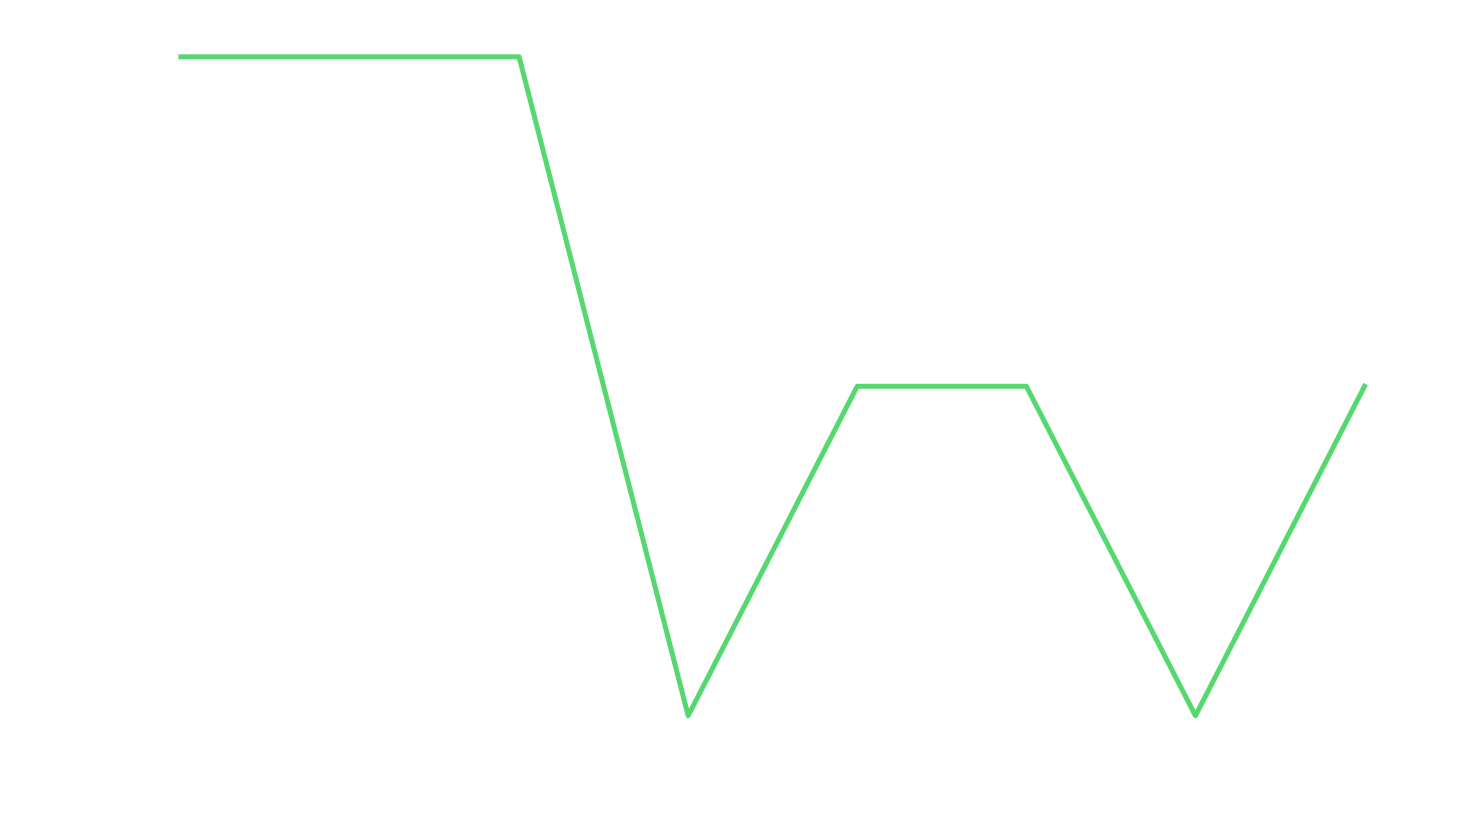

In [24]:
plt.plot(churn_survey.loc[0, 'Response':'Listening'])

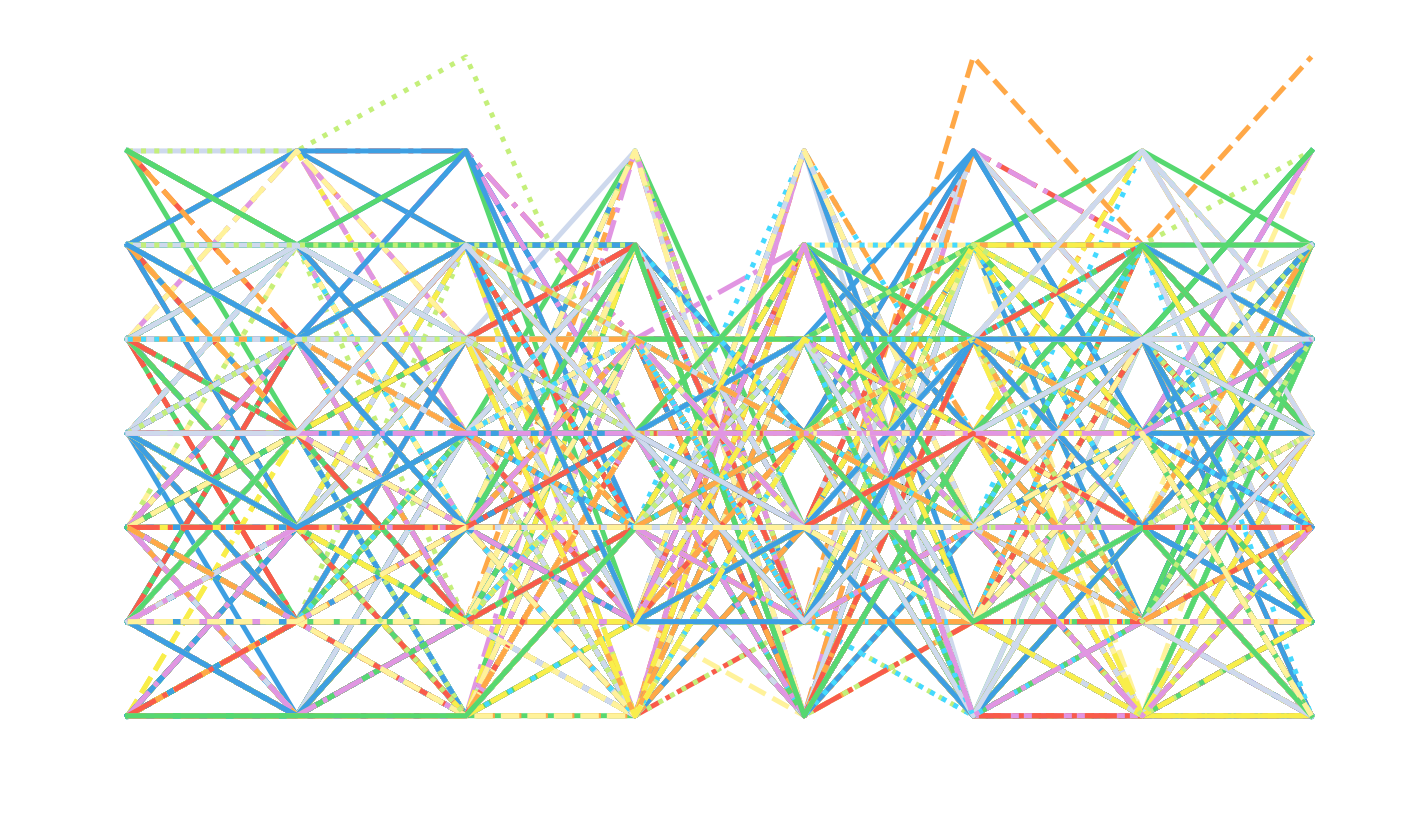

In [25]:
for index, row in churn_survey.iterrows():
    plt.plot(row['Response':'Listening'])

In [26]:
churn_survey

,Churn,Response,Fix,Replace,Reliability,Options,Respect,Courteous,Listening
0,No,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0
1,Yes,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0
2,No,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0
3,No,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0
4,Yes,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...
9999,No,2.0,2.0,3.0,3.0,3.0,3.0,4.0,1.0
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <span style="color:red">Part III: Data Cleaning</span>

#### D.  Summarize the data-cleaning process by doing the following:

1.  Describe the findings, including all anomalies, from the implementation of the data-cleaning plan from part C.

2.  Justify your methods for mitigating each type of discovered anomaly in the data set.

3.  Summarize the outcome from the implementation of each data-cleaning step.

4.  Provide the code used to mitigate anomalies.

5.  Provide a copy of the cleaned data set.

6.  Summarize the limitations of the data-cleaning process.

7.  Discuss how the limitations in part D6 affect the analysis of the question or decision from part A.

### <span style="color:green">Data-cleaning process description</span>
D1.
D2.
D3.
D4.
D5.
D6.<b>Limitations</b>: Limitations given the telecom company data set are that the data are not coming from an warehouse.  It this scenario, it is as though I initiated and gathered the data.  So, I am not able to reach out to the folks that organized and gathered this information and ask them why certain NAs are there, why are fields such as age or yearly bandwidth used missing information that might be relevant to answering questions about customer retention or churn.  In a real world project, you would be able to go down to the department where these folks worked and fill in the empty fields or discover why fields are left blank.
D7.

#### E.  Apply principal component analysis (PCA) to identify the significant features of the data set by doing the following:

1.  List the principal components in the data set.

2.  Describe how you identified the principal components of the data set.

3.  Describe how the organization can benefit from the results of the PCA

### <span style="color:green">PCA description</span>

## <span style="color:red">Part IV: Supporting Documents</span>

#### F.  Provide a Panopto recording that demonstrates the warning- and error-free functionality of the code used to support the discovery of anomalies and the data cleaning process and summarizes the programming environment.


#### G.  Reference the web sources used to acquire segments of third-party code to support the application. Be sure the web sources are reliable.

#### H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

#### I.  Demonstrate professional communication in the content and presentation of your submission.

#### Use nbconvert to create pdf

In [ ]:
import nbformat
from nbconvert.preprocessors import ExecutePreprocessor

In [28]:
# with open(D206_Performance_Assessment.ipynb) as f:
#     nb = nbformat.read(f, as_version=4)